# Machine Learning with PyTorch and Scikit-Learn  
# -- Code Examples

## Package version checks

Add folder to path in order to load from the check_packages.py script:

In [2]:
import sys
print(sys.path)
sys.path.insert(0, '..')
print(sys.path)

['c:\\Users\\vanshika.gupta\\AppData\\Local\\anaconda3\\envs\\pyml-book\\python39.zip', 'c:\\Users\\vanshika.gupta\\AppData\\Local\\anaconda3\\envs\\pyml-book\\DLLs', 'c:\\Users\\vanshika.gupta\\AppData\\Local\\anaconda3\\envs\\pyml-book\\lib', 'c:\\Users\\vanshika.gupta\\AppData\\Local\\anaconda3\\envs\\pyml-book', '', 'c:\\Users\\vanshika.gupta\\AppData\\Local\\anaconda3\\envs\\pyml-book\\lib\\site-packages', 'c:\\Users\\vanshika.gupta\\AppData\\Local\\anaconda3\\envs\\pyml-book\\lib\\site-packages\\win32', 'c:\\Users\\vanshika.gupta\\AppData\\Local\\anaconda3\\envs\\pyml-book\\lib\\site-packages\\win32\\lib', 'c:\\Users\\vanshika.gupta\\AppData\\Local\\anaconda3\\envs\\pyml-book\\lib\\site-packages\\Pythonwin']
['..', 'c:\\Users\\vanshika.gupta\\AppData\\Local\\anaconda3\\envs\\pyml-book\\python39.zip', 'c:\\Users\\vanshika.gupta\\AppData\\Local\\anaconda3\\envs\\pyml-book\\DLLs', 'c:\\Users\\vanshika.gupta\\AppData\\Local\\anaconda3\\envs\\pyml-book\\lib', 'c:\\Users\\vanshika.gupt

Check recommended package versions:

In [3]:
from python_environment_check import check_packages


d = {
    'numpy': '1.21.2',
    'matplotlib': '3.4.3',
    'torch': '1.9.0',
}
check_packages(d)

[OK] Your Python version is 3.9.20 | packaged by conda-forge | (main, Sep 30 2024, 17:43:23) [MSC v.1929 64 bit (AMD64)]
[OK] numpy 1.21.2
[OK] matplotlib 3.4.3
[OK] torch 1.9.0+cpu


# Chapter 12: Parallelizing Neural Network Training with PyTorch (Part 1/2)


- [PyTorch and training performance](#PyTorch-and-training-performance)
  - [Performance challenges](#Performance-challenges)
  - [What is PyTorch?](#What-is-PyTorch?)
  - [How we will learn PyTorch](#How-we-will-learn-PyTorch)
- [First steps with PyTorch](#First-steps-with-PyTorch)
  - [Installing PyTorch](#Installing-PyTorch)
  - [Creating tensors in PyTorch](#Creating-tensors-in-PyTorch)
  - [Manipulating the data type and shape of a tensor](#Manipulating-the-data-type-and-shape-of-a-tensor)
  - [Applying mathematical operations to tensors](#Applying-mathematical-operations-to-tensors)
  - [Split, stack, and concatenate tensors](#Split,-stack,-and-concatenate-tensors)

Note that the optional watermark extension is a small IPython notebook plugin that I developed to make the code reproducible. You can just skip the following line(s).

In [10]:
from IPython.display import Image as IPythonImage
%matplotlib inline

## PyTorch and training performance

### Performance challenges
- by default python excecutes on 1 core due to **GIL global interpreter lock** 
- cab yuse multiprocessing library
- the problem happens bcoz of complex models, number of unit in architecture is high, aprox 80,000 parameters in `([784*100 +100] +[100 * 10]+10 =79,510) `.
- Usage of **Graphics processing units** GPUs is better than **Central Processing unit** CPUs
- GPUs understand coding in CUDA or OpenCL
- Although Pytorch is devloped and works for us 

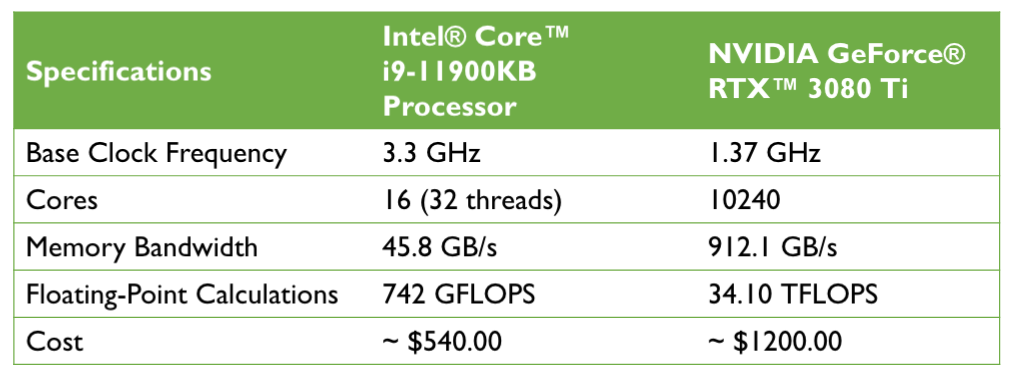

In [5]:
IPythonImage(filename='figures/12_01.png', width=500)

### What is PyTorch?
- Pytorch is a scalablr and mutiplatofrm programming interface for implementing and running ML algos, including convenience wrappers for deep learning
- by FAIR- Facebook Ai reaserch
- exceutes on CPUs, (GPUs and XLA such as TPUs) beter
- use torch library
- its built around a computations graph composed of a set of nodes - [Read pytorch blog](https://pytorch.org/blog/computational-graphs-constructed-in-pytorch/)
- **Tensor** can be understand as a generalization of scalars , vectors , matrices and so on.
-  **autograd** is a system that allows you to compute gradients of outputs with respect to inputs in   
-  To compute those gradient of the loss function with respect to the given parameter, PyTorch has a built-in differentiation engine called `torch.autograd`. It supports automatic computation of gradient for any computational graph.

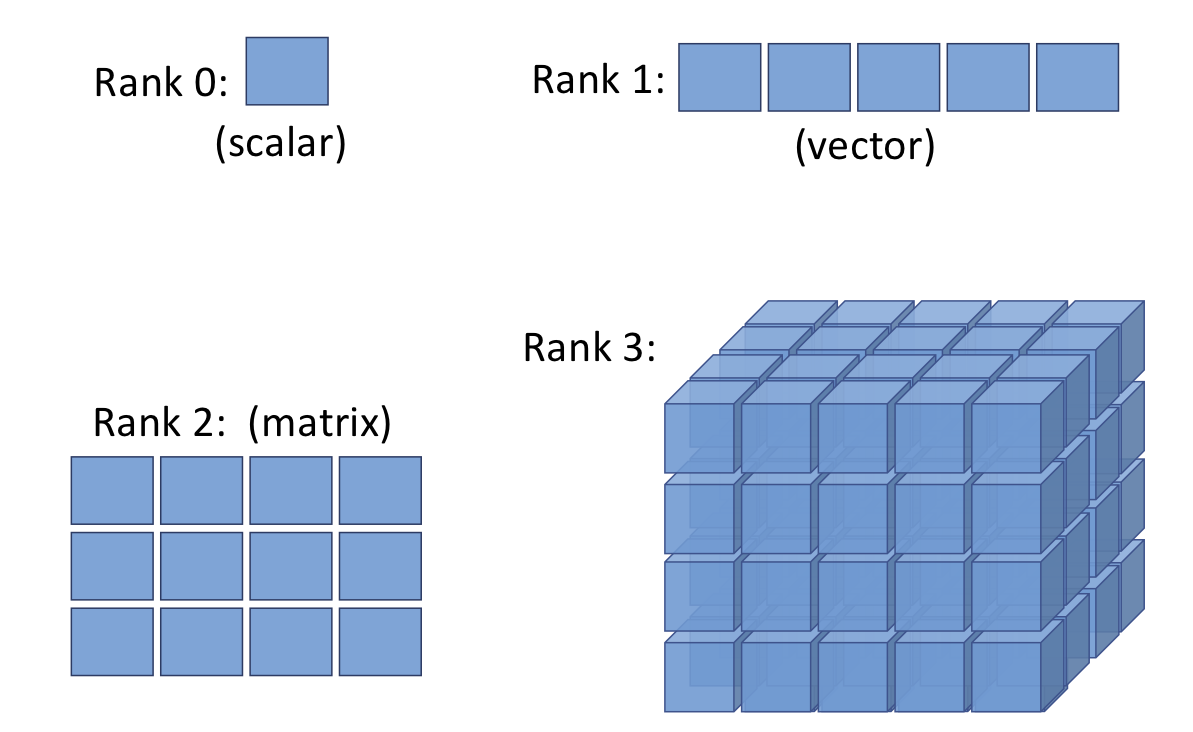

In [6]:
IPythonImage(filename='figures/12_02.png', width=500)

### How we will learn PyTorch
- creation and manipulation of tensors
- load data and utilize `torch.utils.data` module - allow iterate thru datasets
-  ready to use dataset in `torch.utils.data.Dataset` submodule

## First steps with PyTorch

### Installing PyTorch

In [7]:
# ! pip install torch

In [8]:
import torch
import numpy as np

print('PyTorch version:', torch.__version__)

np.set_printoptions(precision=3)

PyTorch version: 1.9.0+cpu


In [9]:
! python -c "import torch; print(torch.__version__)"  # Output: 1.9.0+cpu

1.9.0+cpu


Cloud computing: Introduction to  Artificial Neural Networks  and Deep Learningwith Applications in Python [pdf](appendix_h_cloud-computing.pdf)

### Creating tensors in PyTorch

In [10]:
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)

t_a = torch.tensor(a)
t_b = torch.from_numpy(b)

print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [11]:
torch.is_tensor(a), torch.is_tensor(t_a)

(False, True)

In [12]:
t_ones = torch.ones(2, 3)

t_ones.shape

torch.Size([2, 3])

In [13]:
print(t_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [14]:
rand_tensor = torch.rand(2,3)

print(rand_tensor)

tensor([[0.3250, 0.9779, 0.0474],
        [0.3543, 0.9887, 0.7041]])


### Manipulating the data type and shape of a tensor
- **Tensor Attributes** : Each torch.Tensor has a torch.dtype, torch.device, and torch.layout. [Link](https://pytorch.org/docs/stable/tensor_attributes.html)

In [15]:
t_a_new = t_a.to(torch.int64)

print(t_a_new.dtype)

torch.int64


In [16]:
t = torch.rand(3, 5)

t_tr = torch.transpose(t, 0, 1)
print(t)
print(t_tr)
print(t.shape, ' --> ', t_tr.shape)

tensor([[0.7327, 0.2685, 0.2998, 0.2180, 0.0941],
        [0.0617, 0.4392, 0.9938, 0.4385, 0.8225],
        [0.8965, 0.9576, 0.9974, 0.6724, 0.4876]])
tensor([[0.7327, 0.0617, 0.8965],
        [0.2685, 0.4392, 0.9576],
        [0.2998, 0.9938, 0.9974],
        [0.2180, 0.4385, 0.6724],
        [0.0941, 0.8225, 0.4876]])
torch.Size([3, 5])  -->  torch.Size([5, 3])


In [17]:
t = torch.zeros(30)
# 1D to 2D
t_reshape = t.reshape(5, 6)
print(t)
print(t_reshape)
print(t_reshape.shape)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.])
tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
torch.Size([5, 6])


In [18]:
t = torch.zeros(1, 2, 1, 4, 1)

t_sqz = torch.squeeze(t, 2)

print(t.shape, ' --> ', t_sqz.shape)

torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])


### Applying mathematical operations to tensors
- helps in linear algebra
- PyTorch documentation [Link](https://pytorch.org/docs/stable/index.html)

In [19]:
torch.manual_seed(1)

t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))
print(t1)
print(t2)

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])
tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])


In [20]:
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [21]:
t4 = torch.mean(t1, axis=0)   # sum(), std()
print(t4)

tensor([-0.1373,  0.2028])


In [22]:
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))

print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [23]:
t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)

print(t6)

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


In [24]:
# for computing linear alg L the power p norm of a tensor
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)

print(norm_t1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


In [25]:
np.sqrt(np.sum(np.square(t1.numpy()), axis=1))

array([0.678, 0.508, 1.116, 0.549, 0.185], dtype=float32)

### Split, stack, and concatenate tensors
- PyTorch documentation [Link](https://pytorch.org/docs/stable/index.html)

In [26]:
torch.manual_seed(1)

t = torch.rand(6)

print(t)

t_splits = torch.chunk(t, 3)
print(t)
print([item.numpy() for item in t_splits])
print([item for item in t_splits])

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])
tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])
[array([0.758, 0.279], dtype=float32), array([0.403, 0.735], dtype=float32), array([0.029, 0.8  ], dtype=float32)]
[tensor([0.7576, 0.2793]), tensor([0.4031, 0.7347]), tensor([0.0293, 0.7999])]


In [27]:
torch.manual_seed(1)
t = torch.rand(5)

print(t)

t_splits = torch.split(t, split_size_or_sections=[3, 2])
print(t_splits)
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])
(tensor([0.7576, 0.2793, 0.4031]), tensor([0.7347, 0.0293]))


[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

In [28]:
A = torch.ones(3)
B = torch.zeros(2)

C = torch.cat([A, B], axis=0)
print(C)

tensor([1., 1., 1., 0., 0.])


In [29]:
A = torch.ones(3)
B = torch.zeros(3)

S = torch.stack([A, B], axis=1)
print(S)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


## Building input pipelines in PyTorch

- usually train the model incrementally using iterative optimization algorithm such as stocastic gradient descent
- training dataset can be loaded as a tensor into the memory, which we use for training
- when data is very large, we store it on a batch by divide dataset into pieces
- need to construct data processing pipeline, which contain transformational and preprocessing steps - > such as centering , scaling, adding noise to augment the training procedure and prevent overfitting
- use of pytorch methods - **pytorch datasets and dataloaders** for loading, suffling and batching

### Creating a PyTorch DataLoader from existing tensors
- can use tensors , numpy or python list

In [30]:
from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)
print(t)
data_loader = DataLoader(t)
print(data_loader)  # RETURN obejct of dataloader

tensor([0., 1., 2., 3., 4., 5.])


In [31]:
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [32]:
data_loader = DataLoader(t, batch_size=3, drop_last=False) # drop_last to drop non full batch
print(data_loader)
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


### Combining two tensors into a joint dataset
- we could have a tensor for features and a tensor for labels.
- build dataset to combine these tensors, which will allow us to retrive the elements of these tensors in **tuples**.
- use Joindataset or TensorDataset

In [33]:
from torch.utils.data import Dataset

class JointDataset(Dataset):
    def __init__(self, x, y): # initial logic happend, such as reading exiting arrays, loading a file , filtering data and so forth
        self.x = x
        self.y = y
    def __len__(self): # 
        return len(self.x)
    def __getitem__(self, idx): # return the corresponding sample to the given index
        return self.x[idx], self.y[idx]

In [34]:
torch.manual_seed(1)

In [35]:
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)
print(t_x)
print(t_y)

tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999],
        [0.3971, 0.7544, 0.5695],
        [0.4388, 0.6387, 0.5247]])
tensor([0, 1, 2, 3])


In [36]:
joint_dataset = JointDataset(t_x, t_y)

for example in joint_dataset:
    print('  x: ', example[0], 
          '  y: ', example[1])

  x:  tensor([0.7576, 0.2793, 0.4031])   y:  tensor(0)
  x:  tensor([0.7347, 0.0293, 0.7999])   y:  tensor(1)
  x:  tensor([0.3971, 0.7544, 0.5695])   y:  tensor(2)
  x:  tensor([0.4388, 0.6387, 0.5247])   y:  tensor(3)


In [37]:

# Or use TensorDataset directly
from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x, t_y)
# t_y should be dataset which is labeled

for example in joint_dataset:
    print('  x: ', example[0], 
          '  y: ', example[1])
    
#! common error could be that the element wise correspondence betweeen the original features and labels might be lost

  x:  tensor([0.7576, 0.2793, 0.4031])   y:  tensor(0)
  x:  tensor([0.7347, 0.0293, 0.7999])   y:  tensor(1)
  x:  tensor([0.3971, 0.7544, 0.5695])   y:  tensor(2)
  x:  tensor([0.4388, 0.6387, 0.5247])   y:  tensor(3)


  - if dataset created from the list of images filenames on disk, we can define function to load these filenames

### Shuffle, batch, and repeat

In [38]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])

batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
         y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])


- when training a model for multiple epochs, we need to shuffle and iterate over the dataset by desired number of epochs

In [39]:
for epoch in range(10):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])

epoch 1
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([0, 2])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])
epoch 2
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
         y: tensor([0, 1])
epoch 3
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([0, 3])
batch 2: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7347, 0.0293, 0.7999]]) 
         y: tensor([2, 1])
epoch 4
batch 1: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])
batch 2: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
         y: tensor([2, 0])
epoch 5
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
      

### Creating a dataset from files on your local storage disk

- 2 modules used:
- `import pathlib `, `from PIL import Image` using to read the image the file
- transforms in `torchvision` to decode the raw contents and resize the image

In [1]:
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')
print(imgdir_path)
print([path for path in imgdir_path.glob('*.jpg')])

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')]) #  imgdir_path.glob('*.jpg')
 
print(file_list)

cat_dog_images
[WindowsPath('cat_dog_images/cat-01.jpg'), WindowsPath('cat_dog_images/cat-02.jpg'), WindowsPath('cat_dog_images/cat-03.jpg'), WindowsPath('cat_dog_images/dog-01.jpg'), WindowsPath('cat_dog_images/dog-02.jpg'), WindowsPath('cat_dog_images/dog-03.jpg')]
['cat_dog_images\\cat-01.jpg', 'cat_dog_images\\cat-02.jpg', 'cat_dog_images\\cat-03.jpg', 'cat_dog_images\\dog-01.jpg', 'cat_dog_images\\dog-02.jpg', 'cat_dog_images\\dog-03.jpg']


Figure(1000x500)
cat-01.jpg
Image shape:  (900, 1200, 3)
cat-02.jpg
Image shape:  (900, 1200, 3)
cat-03.jpg
Image shape:  (900, 742, 3)
dog-01.jpg
Image shape:  (800, 1200, 3)
dog-02.jpg
Image shape:  (800, 1200, 3)
dog-03.jpg
Image shape:  (900, 1200, 3)


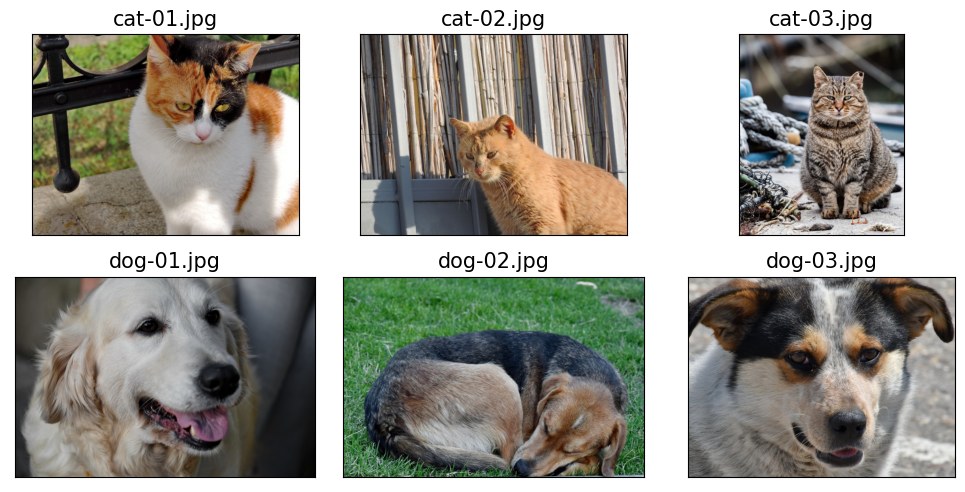

In [2]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np


fig = plt.figure(figsize=(10, 5))
print(fig)
for i, file in enumerate(file_list):
    
    img = Image.open(file)
    
    print(os.path.basename(file))
    print('Image shape: ', np.array(img).shape)
    
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    
    ax.set_title(os.path.basename(file), size=15)  # (os.path.basename(file))
    ax.imshow(img)
    
#plt.savefig('figures/12_03.pdf')
plt.tight_layout()
plt.show()

In [3]:
labels = [1 if 'dog' in os.path.basename(file) else 0
          for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [4]:
from torch.utils.data import Dataset

class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]      
        label = self.labels[index]
        return file, label

    def __len__(self):
        return len(self.labels)
    
image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

c:\Users\vanshika.gupta\AppData\Local\anaconda3\envs\pyml-book\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cat_dog_images\cat-01.jpg 0
cat_dog_images\cat-02.jpg 0
cat_dog_images\cat-03.jpg 0
cat_dog_images\dog-01.jpg 1
cat_dog_images\dog-02.jpg 1
cat_dog_images\dog-03.jpg 1


- `transforms` moule to resize the image and convert the loaded pixels into tensors

In [5]:
import torchvision.transforms as transforms

class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    
    # wraps all four steps into a single functiong including 
    # the loading of the raw content(images and labels)
    # decoding the images into the tensors
    # and resizing the images
    def __getitem__(self, index):     
        img = Image.open(self.file_list[index])        
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    
    def __len__(self):
        return len(self.labels)
    # return the dataset that can w e iterate over and apply operation like suffling and batching
    
img_height, img_width = 80, 120
    
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])
    
image_dataset = ImageDataset(file_list, labels, transform)

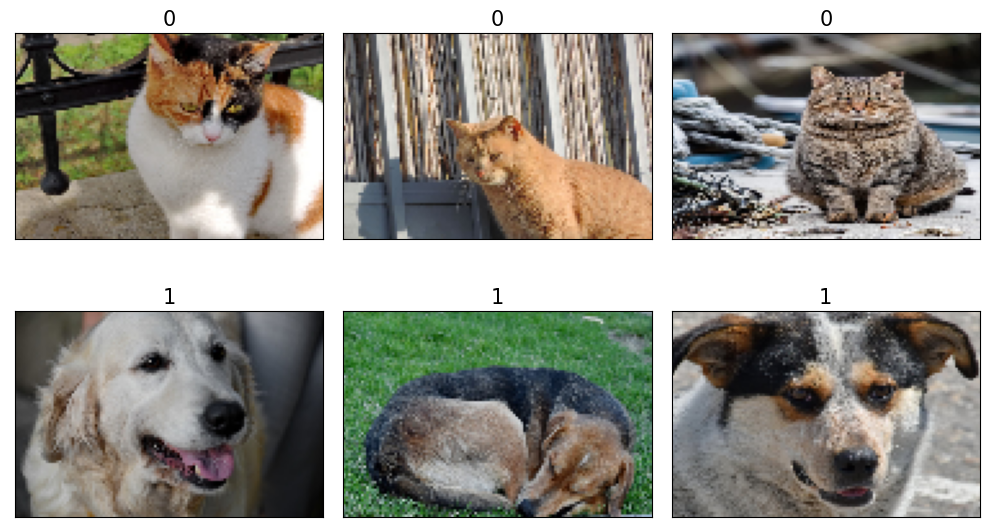

In [6]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)
    
plt.tight_layout()
plt.savefig('figures/12_04.pdf')
plt.show()

### Fetching available datasets from the torchvision.datasets library

In [7]:
# ! pip install torchvision

In [ ]:
import torchvision


**Fetching CelebA dataset**

---

1. Downloading the image files manually

    - You can try setting `download=True` below. If this results in a `BadZipfile` error, we recommend downloading the `img_align_celeba.zip` file manually from http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html. In the Google Drive folder, you can find it under the `Img` folder as shown below:

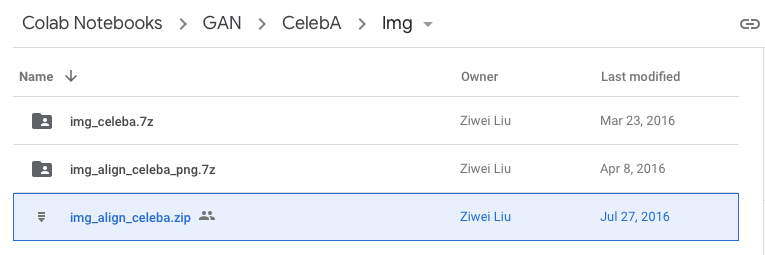

In [11]:
IPythonImage(filename='figures/gdrive-download-location-1.png', width=500)

- You can also try this direct  link: https://drive.google.com/file/d/0B7EVK8r0v71pZjFTYXZWM3FlRnM/view?usp=sharing&resourcekey=0-dYn9z10tMJOBAkviAcfdyQ
- After downloading, please put this file into the `./celeba` subolder and unzip it.

2. Next,  you need to download the annotation files and put them into the same `./celeba` subfolder. The annotation files can be found under `Anno`:

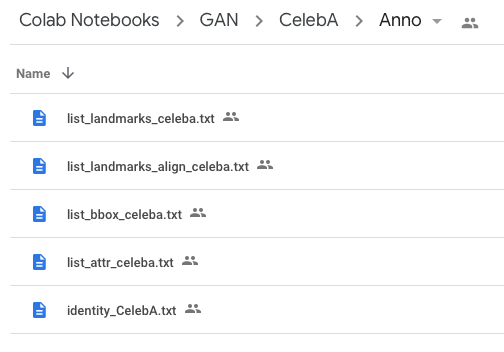

In [12]:
IPythonImage(filename='figures/gdrive-download-location-2.png', width=300)

- direct links are provided below:
  - [identity_CelebA.txt](https://drive.google.com/file/d/1_ee_0u7vcNLOfNLegJRHmolfH5ICW-XS/view?usp=sharing)
  - [list_attr_celeba.txt](https://drive.google.com/file/d/0B7EVK8r0v71pblRyaVFSWGxPY0U/view?usp=sharing&resourcekey=0-YW2qIuRcWHy_1C2VaRGL3Q)
  - [list_bbox_celeba.txt](https://drive.google.com/file/d/0B7EVK8r0v71pbThiMVRxWXZ4dU0/view?usp=sharing&resourcekey=0-z-17UMo1wt4moRL2lu9D8A)
  - [list_landmarks_align_celeba.txt](https://drive.google.com/file/d/0B7EVK8r0v71pd0FJY3Blby1HUTQ/view?usp=sharing&resourcekey=0-aFtzLN5nfdhHXpAsgYA8_g)
  - [list_landmarks_celeba.txt](https://drive.google.com/file/d/0B7EVK8r0v71pTzJIdlJWdHczRlU/view?usp=sharing&resourcekey=0-49BtYuqFDomi-1v0vNVwrQ)

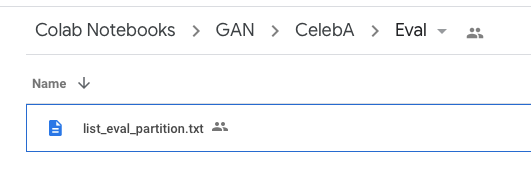

In [13]:
IPythonImage(filename='figures/gdrive-download-location-3.png', width=300)

3. Lastly, you need to download the file `list_eval_partition.txt` and place it under `./celeba`:

- [list_eval_partition.txt](https://drive.google.com/file/d/0B7EVK8r0v71pY0NSMzRuSXJEVkk/view?usp=sharing&resourcekey=0-i4TGCi_51OtQ5K9FSp4EDg)

After completing steps 1-3 above, please ensure you have the following files in your `./celeba` subfolder, and the files are non-empty (that is, they have similar file sizes as shown below):

In [ ]:
# !pip install gdown

In [ ]:
# import gdown

# # The Google Drive file ID
# file_id = "0B7EVK8r0v71pZjFTYXZWM3FlRnM"  # https://drive.google.com/file/d/0B7EVK8r0v71pZjFTYXZWM3FlRnM
# # Construct the download URL
# download_url = f"https://drive.google.com/uc?id={file_id}"

# # Download the file (you can specify the output file name)
# output_path = "dataset.zip"  # Change to the appropriate file type, if necessary
# gdown.download(download_url, output_path, quiet=False)

# # Now you can unzip or read the file based on its format


Downloading...
From (original): https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM
From (redirected): https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM&confirm=t&uuid=0ae115cd-0c0c-41e8-bf35-08a8ca1e6b56
To: d:\Personal\ML\ml notes\Theory\ML with Pytorch and Sklearn\ch12\dataset.zip
100%|██████████| 1.44G/1.44G [01:51<00:00, 12.9MB/s]


'dataset.zip'

In [ ]:
# import zipfile
# with zipfile.ZipFile(output_path, 'r') as zip_ref:
#     zip_ref.extractall("dataset")


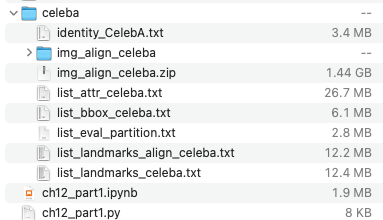

In [14]:
IPythonImage(filename='figures/celeba-files.png', width=400)

---

In [ ]:
image_path = './'
celeba_dataset = torchvision.datasets.CelebA(image_path, split='train', target_type='attr', download=False)

assert isinstance(celeba_dataset, torch.utils.data.Dataset)

In [48]:
example = next(iter(celeba_dataset))
print(example)

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x1332FD850>, tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]))


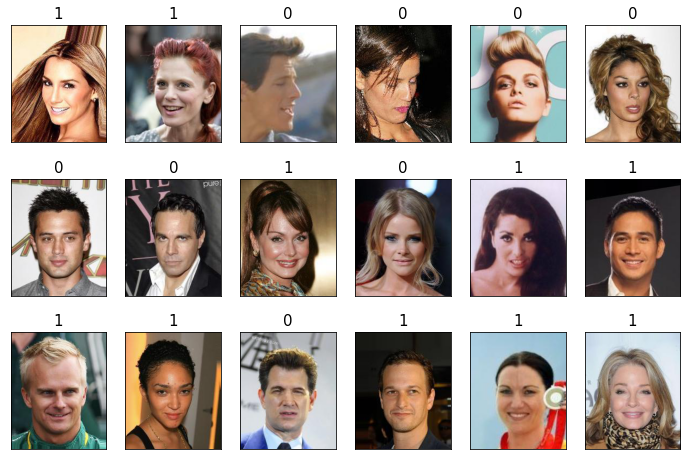

In [49]:
from itertools import islice
fig = plt.figure(figsize=(12, 8))
for i, (image, attributes) in islice(enumerate(celeba_dataset), 18):
    ax = fig.add_subplot(3, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image)
    ax.set_title(f'{attributes[31]}', size=15)
    
#plt.savefig('figures/12_05.pdf')
plt.show()

In [22]:
import torch
from itertools import islice

(<PIL.Image.Image image mode=L size=28x28 at 0x18527A3A400>, 5)


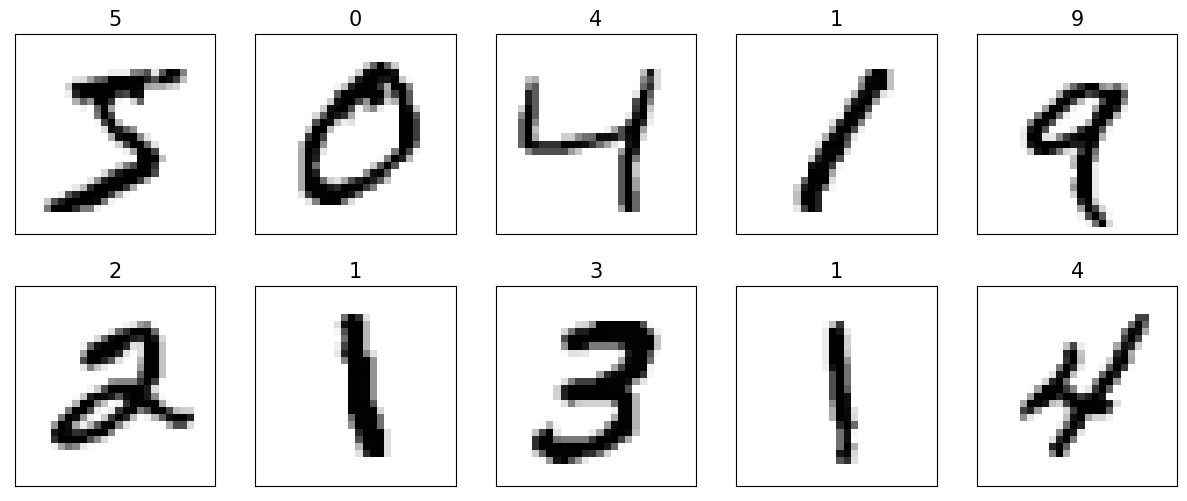

In [23]:
mnist_dataset = torchvision.datasets.MNIST(image_path, 'train', download=True)

assert isinstance(mnist_dataset, torch.utils.data.Dataset)

example = next(iter(mnist_dataset))
print(example)

fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)

#plt.savefig('figures/12_06.pdf')
plt.show()

---

Readers may ignore the next cell.

In [51]:
! python ../.convert_notebook_to_script.py --input ch12_part1.ipynb --output ch12_part1.py

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook ch12_part1.ipynb to script
[NbConvertApp] Writing 11605 bytes to ch12_part1.py
